In [1]:
%run config.py

# Means

In [2]:
%store -r meanRHplist_cumudt10
%store -r meanRHplist_cumu
%store -r meanRHplist_cumu_60hPa
%store -r meanRHplist_cyc_NoU
%store -r meanRHplist_cyc
%store -r meanRHplist_sqll
%store -r meanRHplist_sqllUp

In [3]:
len(meanRHplist_cumudt10)

8

In [4]:
steplist = [1,3,6,12,24,48,96,144]
steplist2 = [1,2,4,8,16,32,48]
labelsRHcomp = ['Cumulonimubus dt=10min', 'Cumulonimbus','Cumulonimbus+U', 'Cyclone', 'Cyclone+U', 'Ligne de grain', 'Ligne de grain+U']
interval = np.linspace(0, 1, len(labelsRHcomp))
colorlist = [mpl.cm.rainbow(i) for i in interval]
colors = np.asarray(['darkred', 'r', 'g', 'lightgreen', 'b', 'skyblue'], dtype=object)

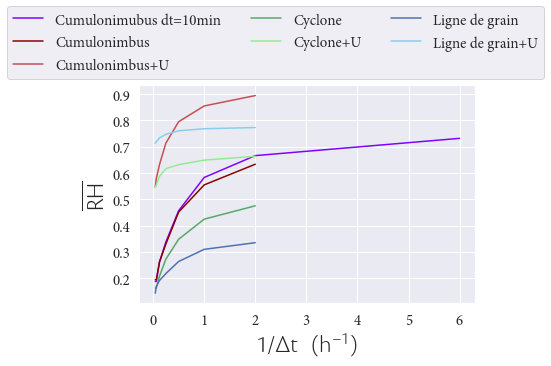

In [5]:
meanRHcomp = [meanRHplist_cumudt10, meanRHplist_cumu, meanRHplist_cumu_60hPa, meanRHplist_cyc_NoU, meanRHplist_cyc, meanRHplist_sqll, meanRHplist_sqllUp]
plt.plot(1/(np.asarray(steplist)*1/6), meanRHplist_cumudt10, color=colorlist[0], label=labelsRHcomp[0])
for i in np.arange(1,len(meanRHcomp)):
    plt.plot(1/(np.asarray(steplist2)*1/2), meanRHcomp[i], color=colors[i-1], label = labelsRHcomp[i])
plt.xlabel('$\mathdefault{1/\Delta t~~(h^{-1})}$ ', fontproperties=Cslabelprop)
plt.ylabel(r'$\mathdefault{\overline{RH}}$', fontproperties=Cslabelprop)
#plt.xlim(25,0)
plt.xticks(font = Mplabelprop)
plt.yticks(font = Mplabelprop)
plt.legend(bbox_to_anchor=(1.23, 1.4), ncol=3, prop=Mplabelprop)
plt.savefig('Figs/meanRHscomp.png', bbox_inches='tight', format='PNG', dpi=600)
plt.show()

In [6]:
%store -r Rhnlist
meanRhlist = []
for i in np.arange(len(Rhnlist)):
    meanRhlist.append(np.mean(Rhnlist[i]))
meanRHlist = [meanRHplist_cumudt10[0], meanRHplist_cumu_60hPa[0], meanRHplist_cyc_NoU[0], meanRHplist_cyc[0], meanRHplist_sqll[0], meanRHplist_sqllUp[0]]

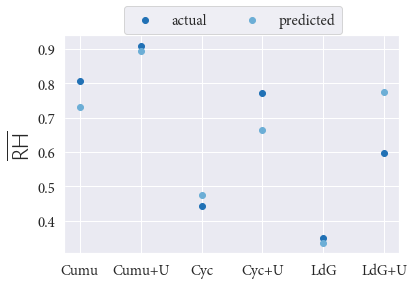

In [7]:
absc = [1,2,3,4,5,6]
labels = ['Cumu', 'Cumu+U', 'Cyc', 'Cyc+U', 'LdG', 'LdG+U']
plt.scatter(absc, meanRhlist, label='actual')
plt.scatter(absc, meanRHlist, label='predicted')
plt.xticks(absc, labels, font=Mplabelprop)
plt.yticks(font = Mplabelprop)
plt.legend(bbox_to_anchor=(0.85, 1.17), ncol=2, prop=Mplabelprop)
plt.ylabel(r'$\mathdefault{\overline{RH}}$', fontproperties=Cslabelprop)
plt.savefig('Figs/RHmuactualpred.png', bbox_inches='tight', format='PNG', dpi=600)
plt.show()

In [8]:
steplist = [1,2,4,8,16,32,48]
steplist2 = [1,3,6,12,24,48,96,144]
nsampleslist = [10,10,8,9,9,9]
namelist = ['Cumu', 'Cumu_U', 'Cyc', 'Cyc_U', 'Sqll', 'Sqll_U']
namelist2 = ['RHp', 'RHp_CumuUp', 'RHp_cyc_NoU', 'RHp_cyc', 'RHp_sqll', 'RHp_sqllUp']

In [9]:
for step in tqdmn(steplist):
    for name,name2,nsamples in zip(namelist,namelist2,nsampleslist):
        locals()['RHplist'+str(name)+str(step)] = np.zeros((nsamples, 128*128))
        locals()['RHplist'+str(name)+str(step)][0] = np.loadtxt('RHarrays/'+str(name2)+str(step)+'.txt').flatten()
        for i in np.arange(2,nsamples+1):
            locals()['RHplist'+str(name)+str(step)][i-1] = np.loadtxt('RHarrays/'+str(name2)+str(step)+'_'+str(i)+'.txt').flatten()
        locals()['RHplist'+str(name)+str(step)] = locals()['RHplist'+str(name)+str(step)].flatten()

for step in tqdmn(steplist2):
    locals()['RHplistCumuDt10'+str(step)] = np.zeros((nsamples, 128*128))
    locals()['RHplistCumuDt10'+str(step)][0] = np.loadtxt('RHarrays/RHp_dt10_'+str(step)+'.txt').flatten()
    for i in np.arange(2,nsamples+1):
        locals()['RHplistCumuDt10'+str(step)][i-1] = np.loadtxt('RHarrays/RHp_dt10_'+str(step)+'_'+str(i)+'.txt').flatten()
    locals()['RHplistCumuDt10'+str(step)] = locals()['RHplistCumuDt10'+str(step)].flatten()

In [10]:
np.shape(RHplistSqll_U1)

(147456,)

In [11]:
RHdatalist = [RHplistCumuDt101, RHplistCumu_U1, RHplistCyc1, RHplistCyc_U1, RHplistSqll1, RHplistSqll_U1]
RHstdlist = []
for index in RHdatalist:
    RHstdlist.append(np.std(index))

Rhstdlist = []
for i in np.arange(len(Rhnlist)):
    Rhstdlist.append(np.std(Rhnlist[i]))

## Variabilité temporelle de la moyenne

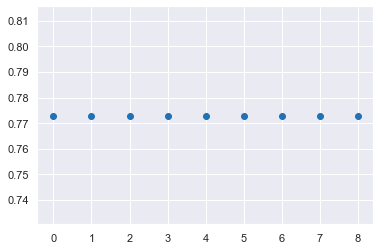

0.0


In [12]:
TEST = np.reshape(RHplistSqll_U1, (9,128*128))
TEST.shape
testmeanlst = []
for i in np.arange(len(TEST)):
    testmeanlst.append(np.mean(TEST[i]))
plt.scatter(np.arange(len(TEST)), testmeanlst)
plt.show()
print(np.std(testmeanlst))

In [91]:
labelsRHfit = ['Cumulonimbus', 'Cumulonimbus+$\mathdefault{\overline{W}}$', 'Cyclone', 'Cyclone+$\mathdefault{\overline{W}}$', 'Ligne de grain', 'Ligne de grain+$\mathdefault{\overline{W}}$']
colors = np.asarray(['darkred', 'r', 'g', 'lightgreen', 'b', 'skyblue'], dtype=object)

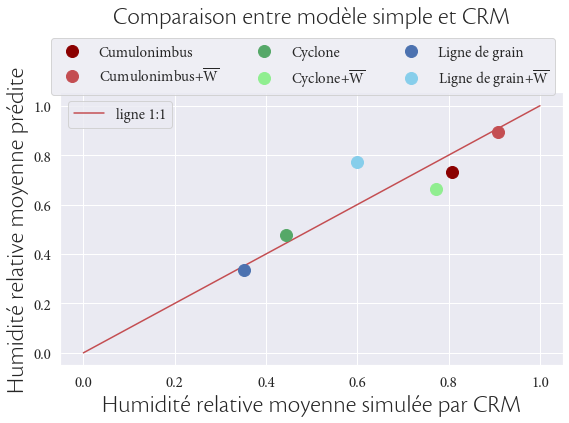

In [92]:
xx = meanRhlist
yy = meanRHlist
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
# fit = ax.plot(np.linspace(0,1,10),np.linspace(0,1,10), color='r', label=r'$\mathdefault{\overline{RH}_{a} = \overline{RH}_{p}}$')
fit = ax.plot(np.linspace(0,1,10),np.linspace(0,1,10), color='r', label=r'ligne 1:1')
leg1 = ax.legend(prop=Mplabelprop)
dataleg = []
for i in np.arange(len(xx)):
    (data,) = ax.plot(xx[i], yy[i], 'o', markersize=12, color = colors[i], label=labelsRHfit[i])
    dataleg.append(data)
leg2 = ax.legend([dataleg[0],dataleg[1],dataleg[2],dataleg[3],dataleg[4],dataleg[5]],labelsRHfit,bbox_to_anchor=(1, 1.23), prop=Mplabelprop, ncol=3)
ax.add_artist(leg1)
plt.xticks(font=Mplabelprop)
plt.yticks(font=Mplabelprop)
# plt.xlabel(r'$\mathdefault{\overline{RH}_{a}}$', fontproperties=Cslabelprop)
# plt.ylabel(r'$\mathdefault{\overline{RH}_{p}}$', fontproperties=Cslabelprop)
plt.xlabel(r'Humidité relative moyenne simulée par CRM', fontproperties=Cslabelprop)
plt.ylabel(r'Humidité relative moyenne prédite', fontproperties=Cslabelprop)
ax.set_title(r'Comparaison entre modèle simple et CRM', y=1.0, pad=70, fontproperties=Cslabelprop)
plt.savefig('Figs/meanRHpvsRHa.png', bbox_inches='tight', format='PNG', dpi=600)
plt.show()          

In [15]:
rmsemeans = sklearn.metrics.mean_squared_error(meanRhlist, meanRHlist, squared=False)
print(rmsemeans)
mean2samples = np.mean(np.array((meanRHlist, meanRhlist)))
pctrmsemean = rmsemeans/mean2samples * 100
print(pctrmsemean)

0.09077372928366421
14.046717296600075


# $\sigma$

## Convergence

In [16]:
stdRHplistCumudt10 = np.zeros(len(steplist2))
for step,i in zip(steplist2, np.arange(len(steplist2))):
    stdRHplistCumudt10[i] = np.std(locals()['RHplistCumuDt10'+str(step)])
for name in tqdmn(namelist):
    locals()['stdRHplist'+str(name)] = np.zeros(len(steplist))
    for step, i in zip(steplist, np.arange(len(steplist))):
        locals()['stdRHplist'+str(name)][i] = np.std(locals()['RHplist'+str(name)+str(step)])

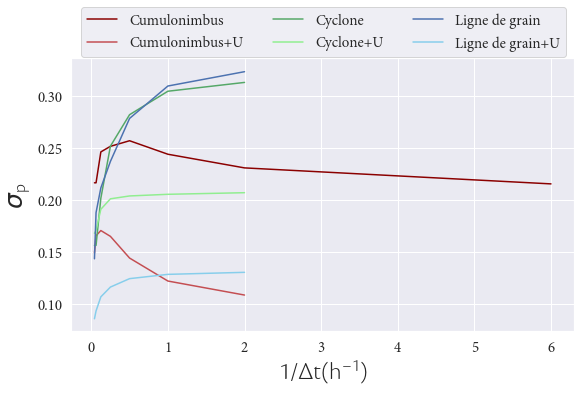

In [17]:
stdcomplist = [stdRHplistCumudt10, stdRHplistCumu_U, stdRHplistCyc, stdRHplistCyc_U, stdRHplistSqll, stdRHplistSqll_U]
fig = plt.figure(figsize=(9,5))
plt.plot(1/(np.asarray(steplist2)*1/6), stdRHplistCumudt10, color = colors[0], label=labelsRHfit[0])
for i in np.arange(1,len(stdcomplist)):
    plt.plot(1/(np.asarray(steplist)*1/2), stdcomplist[i], color = colors[i], label=labelsRHfit[i])
plt.xticks(font=Mplabelprop)
plt.yticks(font=Mplabelprop)
plt.legend(bbox_to_anchor=(1, 1.22), prop=Mplabelprop, ncol=3)
plt.xlabel(r'$\mathdefault{1/\Delta t (h^{-1})}$', fontproperties=Cslabelprop)
plt.ylabel(r'$\sigma\mathdefault{_{p}}$', fontproperties=Cslabelprop)
plt.savefig('Figs/stdRHscomp.png', bbox_inches='tight', format='PNG', dpi=600)
plt.show()

## Comparison

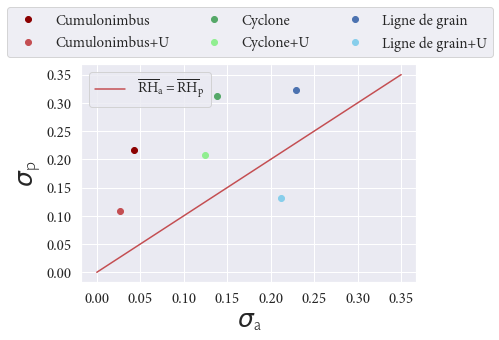

In [18]:
xxstd = Rhstdlist
yystd = RHstdlist
fig = plt.figure()
ax = fig.add_subplot(111)
fit = ax.plot(np.linspace(0,0.35,10),np.linspace(0,0.35,10), color='r', label=r'$\mathdefault{\overline{RH}_{a} = \overline{RH}_{p}}$')
leg1 = ax.legend(prop=Mplabelprop)
dataleg = []
for i in np.arange(len(xxstd)):
    (data,) = ax.plot(xxstd[i], yystd[i], 'o', color = colors[i], label=labelsRHfit[i])
    dataleg.append(data)
leg2 = ax.legend([dataleg[0],dataleg[1],dataleg[2],dataleg[3],dataleg[4],dataleg[5]],labelsRHfit,bbox_to_anchor=(1.25, 1.30), prop=Mplabelprop, ncol=3)
ax.add_artist(leg1)
plt.xticks(font=Mplabelprop)
plt.yticks(font=Mplabelprop)
plt.xlabel(r'$\sigma\mathdefault{_{a}}$', fontproperties=Cslabelprop)
plt.ylabel(r'$\sigma\mathdefault{_{p}}$', fontproperties=Cslabelprop)
plt.savefig('Figs/stdRHpvsRHa.png', bbox_inches='tight', format='PNG', dpi=600)
plt.show()

# Skewness

## Convergence

In [19]:
skewRHplistCumudt10 = np.zeros(len(steplist2))
for step,i in zip(steplist2, np.arange(len(steplist2))):
    skewRHplistCumudt10[i] = sp.skew(locals()['RHplistCumuDt10'+str(step)])
for name in tqdmn(namelist):
    locals()['skewRHplist'+str(name)] = np.zeros(len(steplist))
    for step, i in zip(steplist, np.arange(len(steplist))):
        locals()['skewRHplist'+str(name)][i] = sp.skew(locals()['RHplist'+str(name)+str(step)])

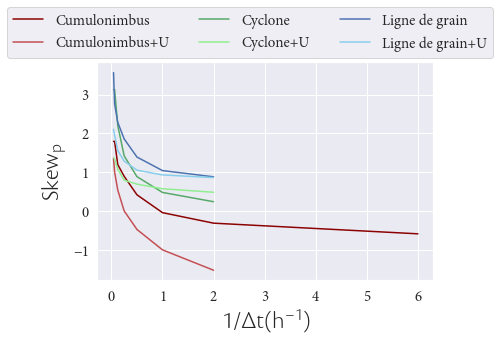

In [20]:
skewcomplist = [skewRHplistCumudt10, skewRHplistCumu_U, skewRHplistCyc, skewRHplistCyc_U, skewRHplistSqll, skewRHplistSqll_U]
plt.plot(1/(np.asarray(steplist2)*1/6), skewRHplistCumudt10, color = colors[0], label=labelsRHfit[0])
for i in np.arange(1,len(skewcomplist)):
    plt.plot(1/(np.asarray(steplist)*1/2), skewcomplist[i], color = colors[i], label=labelsRHfit[i])
plt.xticks(font=Mplabelprop)
plt.yticks(font=Mplabelprop)
plt.legend(bbox_to_anchor=(1.2, 1.29), prop=Mplabelprop, ncol=3)
plt.xlabel(r'$\mathdefault{1/\Delta t (h^{-1})}$', fontproperties=Cslabelprop)
plt.ylabel(r'$\mathdefault{Skew_{p}}$', fontproperties=Cslabelprop)
plt.savefig('Figs/skewRHscomp.png', bbox_inches='tight', format='PNG', dpi=600)
plt.show()

## Comparison

In [21]:
len(RHdatalist)

6

In [22]:
RHskewlist = []
for index in RHdatalist:
    RHskewlist.append(sp.skew(index))

Rhskewlist = []
for i in np.arange(len(Rhnlist)):
    Rhskewlist.append(sp.skew(Rhnlist[i]))

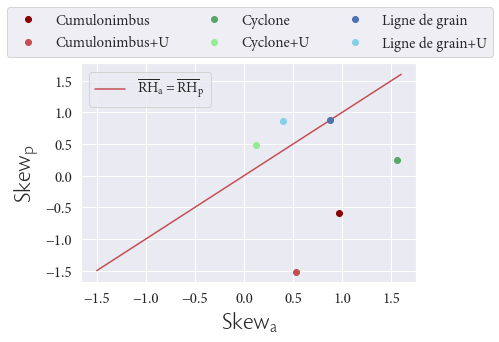

In [23]:
xxskew = Rhskewlist
yyskew = RHskewlist
fig = plt.figure()
ax = fig.add_subplot(111)
fit = ax.plot(np.linspace(-1.5,1.6,10),np.linspace(-1.5,1.6,10), color='r', label=r'$\mathdefault{\overline{RH}_{a} = \overline{RH}_{p}}$')
leg1 = ax.legend(prop=Mplabelprop)
dataleg = []
for i in np.arange(len(xxskew)):
    (data,) = ax.plot(xxskew[i], yyskew[i], 'o', color = colors[i], label=labelsRHfit[i])
    dataleg.append(data)
leg2 = ax.legend([dataleg[0],dataleg[1],dataleg[2],dataleg[3],dataleg[4],dataleg[5]],labelsRHfit,bbox_to_anchor=(1.25, 1.30), prop=Mplabelprop, ncol=3)
ax.add_artist(leg1)
plt.xticks(font=Mplabelprop)
plt.yticks(font=Mplabelprop)
plt.xlabel(r'$\mathdefault{Skew_{a}}$', fontproperties=Cslabelprop)
plt.ylabel(r'$\mathdefault{Skew_{p}}$', fontproperties=Cslabelprop)
plt.savefig('Figs/skewRHpvsRHa.png', bbox_inches='tight', format='PNG', dpi=600)
plt.show()

# Impact of terms

Next we compare the impact of different factors on humidity, which is more thoroughly explained in $\texttt{Analysis.tex}$
$$
\begin{align}
    \overline{RH}_{dyn}^2-\overline{RH}_{dyn}^1 &= \overline{RH}_{stat}^2-\overline{RH}_{stat}^1 \\
   &+ \overline{RH}_{dyn}^2-\overline{RH}_{dyn}^2(w_1) \\ 
   &+ \overline{RH}_{dyn}^2(w_1)-\overline{RH}_{dyn}^1-\overline{RH}_{stat}^2+\overline{RH}_{stat}^1 
\end{align}
$$

Predicted distributions with static method can be found in $\texttt{altitude_derniere_sat.ipynb}$.  
Dynamically predicted $RH$ are already imported  
$RH$ left to compute and import:  
1. $RH_{dyn}^{Cumu+U}(w_{Cumu})$  
2. $RH_{dyn}^{Cyc+U}(w_{Cyc})$  
3. $RH_{dyn}^{Sqll+U}(w_{Sqll})$  
4. $RH_{dyn}^{Cyc}(w_{Cumu})$  
5. $RH_{dyn}^{Sqll}(w_{Cumu})$  
6. $RH_{dyn}^{Sqll}(w_{Cyc})$  

Importing from $\texttt{altitude_derniere_sat.ipynb}$

In [24]:
%store -r RHplisto

In [25]:
meanRHo_cumu = np.mean(RHplisto[0])
meanRHo_cumuUp = np.mean(RHplisto[1])
meanRHo_cyc = np.mean(RHplisto[2])
meanRHo_cycUp = np.mean(RHplisto[3])
meanRHo_sqll = np.mean(RHplisto[4])
meanRHo_sqllUp = np.mean(RHplisto[5])

# Large scale updraft comparisons

## Cumulonimbus vs Cumulonimbus + U  
$RH_{dyn}^{Cumu+U}(w_{Cumu})$  

In [26]:
RH_CumuUp_wCumu = np.loadtxt('RHarrays/RHplist_CumuUp_wCumu.txt')
meanRH_CumuUp_wCumu = np.mean(RH_CumuUp_wCumu)

Setting up different terms

In [27]:
term1 = meanRHo_cumuUp - meanRHo_cumu
print('term1 = ', term1)
term2 = meanRHlist[1] - meanRH_CumuUp_wCumu
print('term2 = ', term2)
residual = meanRH_CumuUp_wCumu - meanRHlist[0] - meanRHo_cumuUp + meanRHo_cumu
print('residual = ', residual)
CumuvsCumuUp = term1 + term2 + residual
print('total = ', CumuvsCumuUp)
termpctlistCumuCumu = [term1, term2, residual]

term1 =  0.0489496168539624
term2 =  0.06925347989795227
residual =  0.04454902232789734
total =  0.16275211907981202


In [28]:
# absc = [0,1,2]
# labels = ['Vertical coherence', 'Vertical speed', 'Temporal coherence']
# plt.bar(np.arange(len(termpctlistCumuCumu)), termpctlistCumuCumu, align='center', width=0.5, color=colorlist[1])
# plt.xticks(absc, labels, font=Csprop)
# plt.yticks(font=Mplabelprop)
# plt.ylabel('$\mathdefault{\Delta RH_c}$', fontproperties=Cslabelprop)
# plt.savefig('Figs/Contrib_CumuvsCumuUp.png',bbox_inches = 'tight', format='PNG', dpi=600)
# plt.show()

## Cyclone vs Cyclone + U
$RH_{dyn}^{Cyc+U}(w_{Cyc})$  

In [29]:
RH_CycUp_wCyc = np.loadtxt('RHarrays/RHplist_CycUp_wCyc.txt')
meanRH_CycUp_wCyc = np.mean(RH_CycUp_wCyc)

In [30]:
term1 = meanRHo_cycUp - meanRHo_cyc
print('term1 = ', term1)
term2 = meanRHlist[3] - meanRH_CycUp_wCyc
print('term2 = ', term2)
residual = meanRH_CycUp_wCyc - meanRHlist[2] - meanRHo_cycUp + meanRHo_cyc
print('residual = ', residual)
CycvsCycUp = term1 + term2 + residual
print('total = ', CycvsCycUp)
termpctlistCycCyc = [term1, term2, residual]

term1 =  0.17087353818889098
term2 =  0.10757800260489603
residual =  -0.0901592952290339
total =  0.18829224556475307


In [31]:
# absc = [1,2,3]
# labels = ['Vertical coherence', 'Vertical speed', 'Temporal coherence']
# plt.bar(absc, termpctlistCycCyc, align='center', width=0.5, color=colorlist[1])
# plt.plot(np.linspace(0.76,3.25,5), np.zeros(len(np.linspace(0.75,3.25,5))), color='black')
# plt.xticks(absc, labels, font=Csprop)
# plt.yticks(font=Mplabelprop)
# plt.ylabel('$\mathdefault{\Delta RH_c}$', fontproperties=Cslabelprop)
# plt.savefig('Figs/Contrib_CycvsCycUp.png',bbox_inches = 'tight', format='PNG', dpi=600)
# plt.show()

## Squall line vs Squall line + U
$RH_{dyn}^{Sqll+U}(w_{Sqll})$  

In [32]:
RH_SqllUp_wSqll = np.loadtxt('RHarrays/RHplist_SqllUp_wSqll.txt')
meanRH_SqllUp_wSqll = np.mean(RH_SqllUp_wSqll)

In [33]:
term1 = meanRHo_sqllUp - meanRHo_sqll
print('term1 = ', term1)
term2 = meanRHlist[5] - meanRH_SqllUp_wSqll
print('term2 = ', term2)
residual = meanRH_SqllUp_wSqll - meanRHlist[4] - meanRHo_sqllUp + meanRHo_sqll
print('residual = ', residual)
SqllvsSqllUp = term1 + term2 + residual
print('total = ', SqllvsSqllUp)
termpctlistSqllSqll = [term1, term2, residual]

term1 =  -0.4369307146234462
term2 =  0.4317470818932634
residual =  0.44322224788762127
total =  0.43803861515743847


In [34]:
# absc = [1,2,3]
# labels = ['Vertical coherence', 'Vertical speed', 'Temporal coherence']
# plt.bar(absc, termpctlistSqllSqll, align='center', width=0.5, color=colorlist[1])
# plt.plot(np.linspace(0.76,3.25,5), np.zeros(len(np.linspace(0.75,3.25,5))), color='black')
# plt.xticks(absc, labels, font=Csprop)
# plt.yticks(font=Mplabelprop)
# plt.ylabel('$\mathdefault{\Delta RH_c}$', fontproperties=Cslabelprop)
# plt.savefig('Figs/Contrib_SqllvsSqllUp.png',bbox_inches = 'tight', format='PNG', dpi=600)
# plt.show()

# Organisation comparisons

## Cumulonimbus vs Cyclone

$RH_{dyn}^{Cyc}(w_{Cumu})$  

In [35]:
RH_Cyc_wCumu = np.loadtxt('RHarrays/RHplist_Cyc_wCumu.txt')
meanRH_Cyc_wCumu = np.mean(RH_Cyc_wCumu)

In [36]:
term1 = meanRHo_cyc - meanRHo_cumu
print('term1 = ', term1)
term2 = meanRHlist[2] - meanRH_Cyc_wCumu
print('term2 = ', term2)
residual = meanRH_Cyc_wCumu - meanRHlist[0] - meanRHo_cyc + meanRHo_cumu
print('residual = ', residual)
CumuvsCyc = term1 + term2 + residual
print('total = ', CumuvsCyc)
termpctlistCumuCyc = [term1, term2, residual]

term1 =  -0.02335498907967519
term2 =  0.027141256746710973
residual =  -0.2604504526887837
total =  -0.2566641850217479


In [37]:
# absc = [1,2,3]
# labels = ['Vertical coherence', 'Vertical speed', 'Temporal coherence']
# plt.plot(np.linspace(0.76,3.25,5), np.zeros(len(np.linspace(0.75,3.25,5))), color='black')
# plt.bar(absc, termpctlistCumuCyc, align='center', width=0.5, color=colorlist[1])
# plt.xticks(absc, labels, font=Csprop)
# plt.yticks(font=Mplabelprop)
# plt.ylabel('$\mathdefault{\Delta RH_c}$', fontproperties=Cslabelprop)
# plt.savefig('Figs/Contrib_CumuvsCyc.png',bbox_inches = 'tight', format='PNG', dpi=600)
# plt.show()

## Cumulonimbus vs Squall line

$RH_{dyn}^{Sqll}(w_{Cumu})$  

In [38]:
RH_Sqll_wCumu = np.loadtxt('RHarrays/RHplist_Sqll_wCumu.txt')
meanRH_Sqll_wCumu = np.mean(RH_Sqll_wCumu)

In [39]:
term1 = meanRHo_sqll - meanRHo_cumu
print('term1 = ', term1)
term2 = meanRHlist[4] - meanRH_Sqll_wCumu
print('term2 = ', term2)
residual = meanRH_Sqll_wCumu - meanRHlist[0] - meanRHo_sqll + meanRHo_cumu
print('residual = ', residual)
CumuvsSqll = term1 + term2 + residual
print('total = ', CumuvsSqll)
termpctlistCumuSqll = [term1, term2, residual]

term1 =  0.5797718734597247
term2 =  0.03759657377054282
residual =  -1.0143646495332683
total =  -0.3969962023030008


In [40]:
# absc = [1,2,3]
# labels = ['Vertical coherence', 'Vertical speed', 'Temporal coherence']
# plt.plot(np.linspace(0.76,3.25,5), np.zeros(len(np.linspace(0.75,3.25,5))), color='black')
# plt.bar(absc, termpctlistCumuSqll, align='center', width=0.5, color=colorlist[1])
# plt.xticks(absc, labels, font=Csprop)
# plt.yticks(font=Mplabelprop)
# plt.ylabel('$\mathdefault{\Delta RH_c}$', fontproperties=Cslabelprop)
# plt.savefig('Figs/Contrib_CumuvsSqll.png',bbox_inches = 'tight', format='PNG', dpi=600)
# plt.show()

## Cyclone vs Squall line

$RH_{dyn}^{Sqll}(w_{Cyc})$  

In [41]:
RH_Sqll_wCyc = np.loadtxt('RHarrays/RHplist_Sqll_wCyc.txt')
meanRH_Sqll_wCyc = np.mean(RH_Sqll_wCyc)

In [42]:
term1 = meanRHo_sqll - meanRHo_cyc
print('term1 = ', term1)
term2 = meanRHlist[4] - meanRH_Sqll_wCyc
print('term2 = ', term2)
residual = meanRH_Sqll_wCyc - meanRHlist[2] - meanRHo_sqll + meanRHo_cyc
print('residual = ', residual)
CycvsSqll = term1 + term2 + residual
print('total = ', CycvsSqll)
termpctlistCycSqll = [term1, term2, residual]

term1 =  0.6031268625393998
term2 =  -0.01794505094098897
residual =  -0.7255138288796636
total =  -0.14033201728125277


In [43]:
# absc = [1,2,3]
# labels = ['Vertical coherence', 'Vertical speed', 'Temporal coherence']
# plt.plot(np.linspace(0.76,3.25,5), np.zeros(len(np.linspace(0.75,3.25,5))), color='black')
# plt.bar(absc, termpctlistCycSqll, align='center', width=0.5, color=colorlist[1])
# plt.xticks(absc, labels, font=Csprop)
# plt.yticks(font=Mplabelprop)
# plt.ylabel('$\mathdefault{\Delta RH_c}$', fontproperties=Cslabelprop)
# plt.savefig('Figs/Contrib_SqllvsCyc.png',bbox_inches = 'tight', format='PNG', dpi=600)
# plt.show()

In [44]:
Complist = [CumuvsCumuUp, CycvsCycUp, SqllvsSqllUp, CumuvsCyc, CumuvsSqll, CycvsSqll]
Termslist = np.asarray([termpctlistCumuCumu, termpctlistCycCyc, termpctlistSqllSqll, termpctlistCumuCyc, termpctlistCumuSqll, termpctlistCycSqll]).flatten()

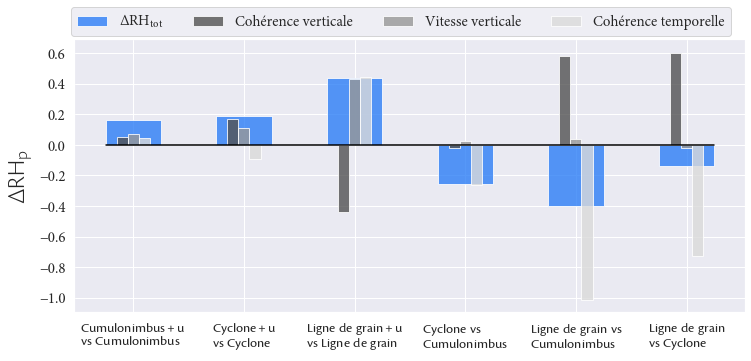

In [49]:
fig,ax = plt.subplots(1,1,figsize=(12,5))
absc = [0,1,2,3,4,5]
absc2 = [-0.1,0,0.1,0.9,1,1.1,1.9,2,2.1,2.9,3,3.1,3.9,4,4.1,4.9,5,5.1]
colors2 = ['r','y','g']*6
colors3 = sns.color_palette("Greys_r", 3)
colors36 = colors3*6
legendlabels = ['Cohérence verticale', 'Vitesse verticale', 'Cohérence temporelle']*6
# labels = ['$\mathdefault{\Delta RH^{Cumu+u}_{Cumu}}$', '$\mathdefault{\Delta RH^{Cyc+u}_{Cyc}}$','$\mathdefault{\Delta RH^{Sqll+u}_{Sqll}}$','$\mathdefault{\Delta RH^{Cyc}_{Cumu}}$','$\mathdefault{\Delta RH^{Sqll}_{Cumu}}$','$\mathdefault{\Delta RH^{Sqll}_{Cyc}}$']
labels = ['$\mathdefault{^{Cumulonimbus+u}_{vs~ Cumulonimbus}}$','$\mathdefault{^{Cyclone+u}_{vs~ Cyclone}}$','$\mathdefault{^{Ligne~de~grain+u}_{vs~ Ligne~de~grain}}$','$\mathdefault{^{Cyclone ~vs}_{Cumulonimbus}}$','$\mathdefault{^{Ligne~de~grain ~vs}_{Cumulonimbus}}$','$\mathdefault{^{Ligne~de~grain}_{vs~ Cyclone}}$']
ax.bar(absc, Complist, width=0.5, color=colorlist[1], label='$\mathdefault{\Delta RH_{tot}}$', alpha=0.8)
for i in np.arange(3):
    ax.bar(absc2[i], Termslist[i], width=0.1, color=colors36[i], label=legendlabels[i], alpha=0.8)
for i in np.arange(3,len(absc2)):
    ax.bar(absc2[i], Termslist[i], width=0.1, color=colors36[i], alpha=0.8)
ax.plot(np.linspace(-0.25,5.25,5), np.zeros(len(np.linspace(-0.25,5.25,5))), color='black')
ax.set_xticks(absc)
ax.set_xticklabels(labels,minor=False)
for tick in ax.get_xticklabels():
    tick.set_fontname("Cronos Pro")
    tick.set_fontsize(20)
plt.yticks(font=Mplabelprop)
plt.ylabel('$\mathdefault{\Delta RH_{p}}$', font = Cslabelprop)
lg = ax.legend(prop=Mplabelprop, ncol=4, bbox_to_anchor=(0.99, 1.15))
# lg.set_title(title = 'Contributions', prop=Cslabelprop)
plt.savefig('Figs/AllComps.png', bbox_inches='tight', format='PNG', dpi=600)
plt.show()

In [81]:
Complist2 = [CumuvsCyc, CumuvsSqll]
Termslist2 = np.asarray([termpctlistCumuCyc, termpctlistCumuSqll]).flatten()

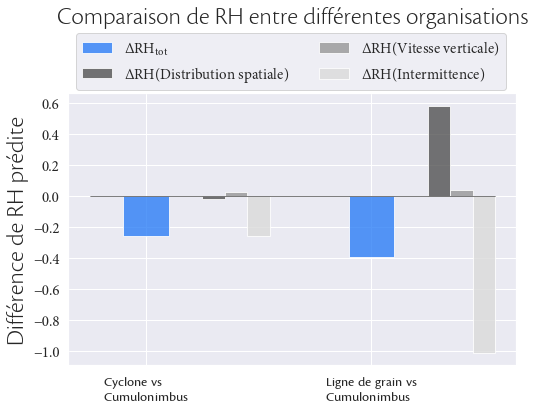

In [105]:
fig,ax = plt.subplots(1,1,figsize=(8,5))
absc = [0,1]
absc2 = [0.3,0.4,0.5,1.3,1.4,1.5]
colors3 = sns.color_palette("Greys_r", 3)
colors36 = colors3*6
legendlabels = ['$\mathdefault{\Delta}$RH(Distribution spatiale)', '$\mathdefault{\Delta}$RH(Vitesse verticale)', '$\mathdefault{\Delta}$RH(Intermittence)']*6
# labels = ['$\mathdefault{\Delta RH^{Cumu+u}_{Cumu}}$', '$\mathdefault{\Delta RH^{Cyc+u}_{Cyc}}$','$\mathdefault{\Delta RH^{Sqll+u}_{Sqll}}$','$\mathdefault{\Delta RH^{Cyc}_{Cumu}}$','$\mathdefault{\Delta RH^{Sqll}_{Cumu}}$','$\mathdefault{\Delta RH^{Sqll}_{Cyc}}$']
labels = ['$\mathdefault{^{Cyclone ~vs}_{Cumulonimbus}}$','$\mathdefault{^{Ligne~de~grain ~vs}_{Cumulonimbus}}$']
ax.bar(absc, Complist2, width=0.2, color=colorlist[1], label='$\mathdefault{\Delta RH_{tot}}$', alpha=0.8)
for i in np.arange(3):
    ax.bar(absc2[i], Termslist2[i], width=0.1, color=colors36[i], label=legendlabels[i], alpha=0.8)
for i in np.arange(3,len(absc2)):
    ax.bar(absc2[i], Termslist2[i], width=0.1, color=colors36[i], alpha=0.8)
ax.plot(np.linspace(-0.25,1.55), np.zeros(len(np.linspace(-0.25,1.55))), color='black', linewidth=0.5)
ax.set_xticks(absc)
ax.set_xticklabels(labels,minor=False)
for tick in ax.get_xticklabels():
    tick.set_fontname("Cronos Pro")
    tick.set_fontsize(20)
plt.yticks(font=Mplabelprop)
# plt.ylabel('$\mathdefault{\Delta RH_{p}}$', font = Cslabelprop)
plt.ylabel('Différence de RH prédite', font = Cslabelprop)
lg = ax.legend(prop=Mplabelprop, ncol=2, bbox_to_anchor=(0.995, 1.25))
# lg.set_title(title = 'Contributions', prop=Cslabelprop)
ax.set_title('Comparaison de RH entre différentes organisations', loc='center', y=1, pad=70, fontproperties=Cslabelprop)
plt.savefig('Figs/OrgComps.png', bbox_inches='tight', format='PNG', dpi=600)
plt.show()

## Plot of all $RH$ distributions together

In [47]:
nbins=10

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


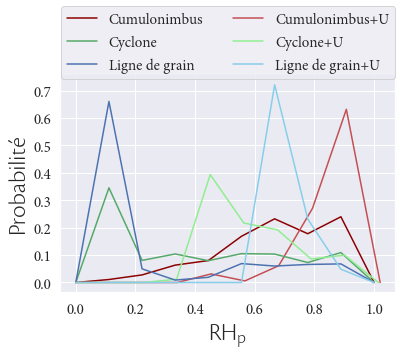

In [48]:
RHndatalist = np.reshape(RHdatalist, 6)
for i in np.arange(len(RHndatalist)):
    RHdatahist = np.asarray(np.histogram(RHndatalist[i], density=True, bins=nbins), dtype=object)
    RHdatadistrib = sp.rv_histogram(RHdatahist)
    RHdataxaxis = np.linspace(0,np.max(RHndatalist[i]),nbins)
    plt.plot(RHdataxaxis, RHdatadistrib.pdf(RHdataxaxis)/np.sum(RHdatadistrib.pdf(RHdataxaxis)), color=colors[i], label=labelsRHfit[i])
plt.xlabel('$\mathdefault{RH_{p}}$', fontproperties=Cslabelprop)
plt.ylabel('Probabilité', fontproperties=Cslabelprop)
plt.xticks(font = Mplabelprop)
plt.yticks(font = Mplabelprop)
handles,labels = plt.gca().get_legend_handles_labels()
handles2 = [None] * 6
labels2 = [None] * 6
handles2[0] = handles[0]
handles2[1] = handles[2]
handles2[2] = handles[4]
handles2[3] = handles[1]
handles2[4] = handles[3]
handles2[5] = handles[5]
labels2[0] = labels[0]
labels2[1] = labels[2]
labels2[2] = labels[4]
labels2[3] = labels[1]
labels2[4] = labels[3]
labels2[5] = labels[5]
plt.legend(handles2, labels2, loc="upper center", bbox_to_anchor=(0.5, 1.35), ncol=2, prop=Mplabelprop)
plt.savefig('Figs/RHpDynProbsSuperposition.png',bbox_inches='tight', format='PNG', dpi=600)
plt.show()